In [141]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import itertools
from operator import itemgetter
import pickle
import numpy as np

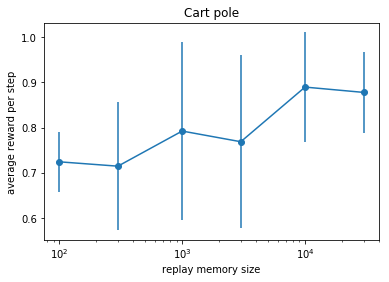

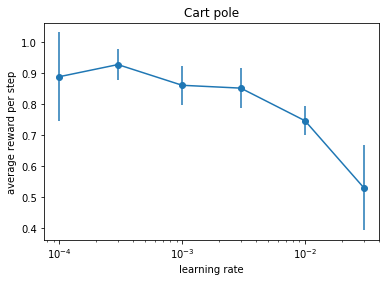

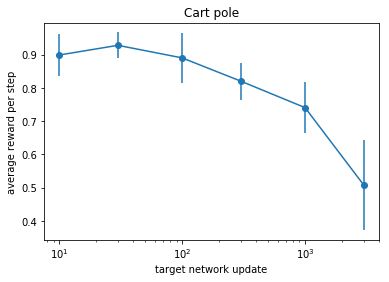

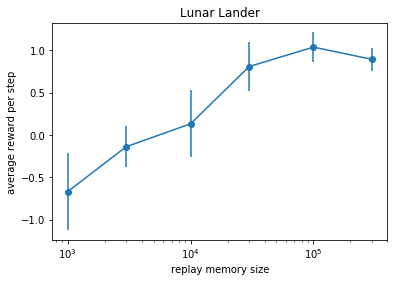

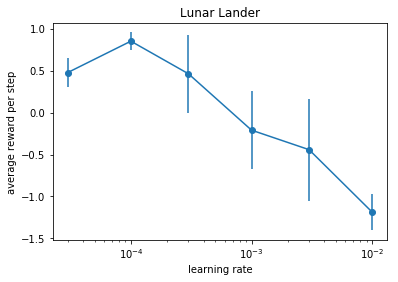

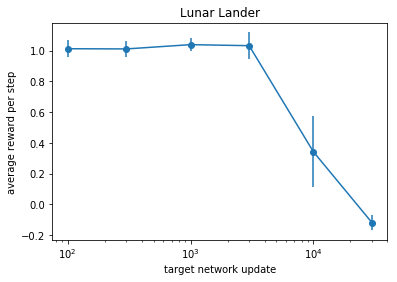

In [143]:
#dqn_replay_memory_size.py

def plot_perf(basedir, plot_title, x_axis, N, n):
    files = glob.glob(basedir + '/*.pkl')
    runs = []
    for full_name in files:
        fname = os.path.splitext(os.path.basename(full_name))[0]
        #print(fname)
        p = float(fname.rsplit('-',1)[0])
        with open(full_name, 'r') as f:
            rewards = pickle.load(f)['reward']
        rewards = np.array(rewards)
        idx = rewards[:,0] >= n
        aver = np.sum(rewards[idx,1]) / (N - n)
        runs.append({
            'p': p,
            'fname': full_name,
            'rewards': rewards,
            'aver_reward': aver
        })
    runs_sorted = sorted(runs, key=itemgetter('p'))
    stats = []
    for k, g in itertools.groupby(runs_sorted, key=lambda x: x['p']):
        #print(k)
        r = np.array([a['aver_reward'] for a in list(g)])
        stats.append([k, r.mean(), r.std()])

    stats = np.array(stats)
    #print(stats)
    plt.figure()
    plt.errorbar(stats[:,0], stats[:,1], yerr=stats[:,2],fmt='o-')
    plt.title(plot_title)
    plt.xlabel(x_axis)
    plt.ylabel('average reward per step')
    ax = plt.gca()
    ax.set_xscale('log') 
    
plot_perf('dqn_replay_memory_size_cartpole', 'Cart pole', 'replay memory size', 100000, 90000)
plot_perf('dqn_learning_rate_cartpole', 'Cart pole', 'learning rate', 100000, 50000)
plot_perf('dqn_target_network_update_cartpole', 'Cart pole', 'target network update', 100000, 50000)
plot_perf('dqn_replay_memory_size_lander', 'Lunar Lander', 'replay memory size', 1000000, 900000)
plot_perf('dqn_learning_rate_lander', 'Lunar Lander', 'learning rate', 1000000, 500000)
plot_perf('dqn_target_network_update_lander', 'Lunar Lander', 'target network update', 1000000, 500000)


*************GET MODEL DQN ***********************
(300000, 4)


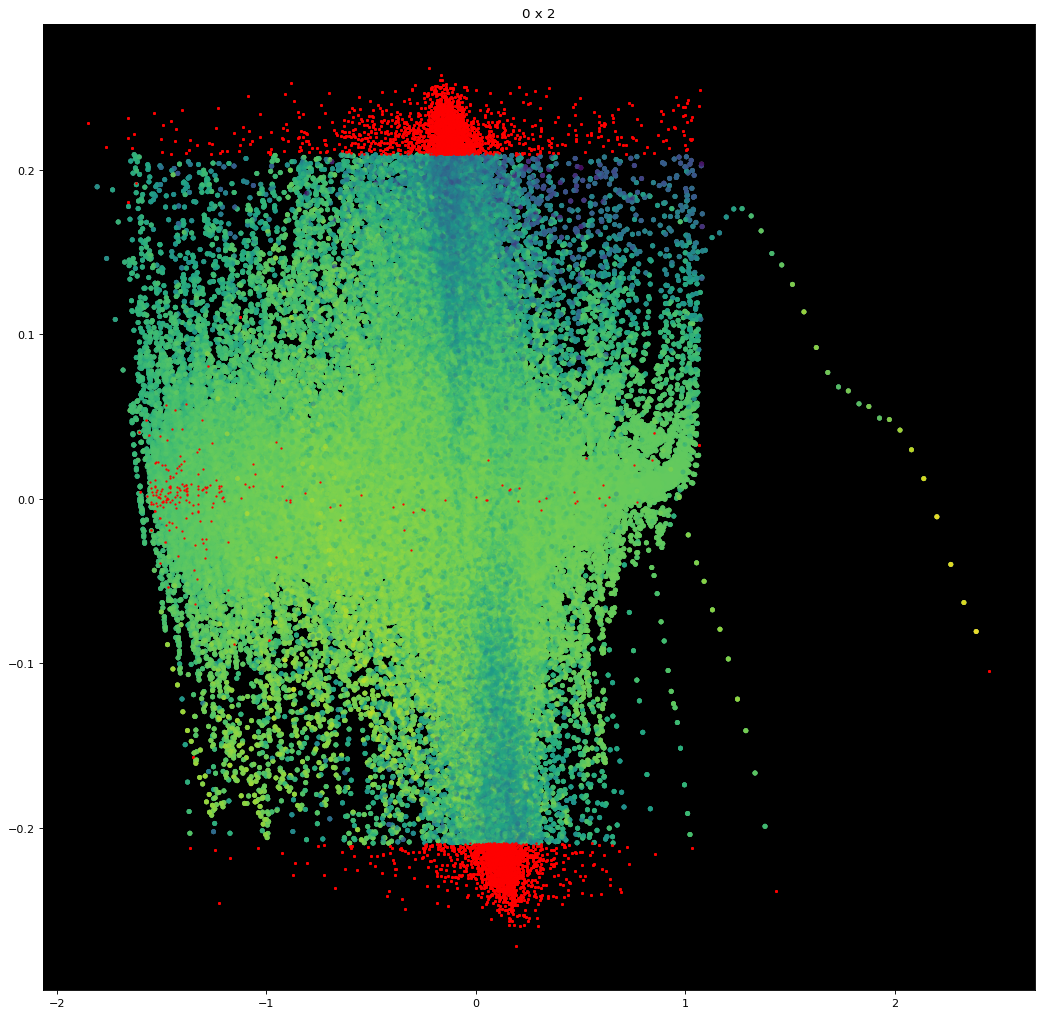

In [244]:
#%load_ext autoreload
#%autoreload 2

import matplotlib
%matplotlib inline
#%matplotlib notebook  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../')

import utils.trajectory_utils
reload(utils.trajectory_utils)
from utils.trajectory_utils import TrajectoryLoader
from nets.net import *

colors = ['blue', 'red', 'green', 'brown', 'gray', 'yellow', 'cyan', 'purple']
counter = 0

modelOps = DqnOps(2)
modelOps.INPUT_SIZE = (4,)
q_model = CartPoleModel(modelOps)

def plot_log(fname):
    global counter
    N = 300000
    tl = TrajectoryLoader(fname)
    s = tl.sample(N)
    #print(s['current'])
    print(s['current'].shape)
    for step,ID in zip(range(100, 30000, 3000), range(0, 10000)):
        q_model.model.load_weights('../test_cartpole2/dqn-15/weights_{}.h5'.format(step))
        s['qvalue'] = q_model.q_value(s['current']).max(axis=1)#[:,1]#
        for I in range(s['next'].shape[1]):
            for J in range(s['next'].shape[1]):
                if I<J and I==0 and J==2: #and J<K:# and I==0 and J==1:
                    fig = plt.figure(num=I*16+J*4, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
                    i1 = s['done'].flatten() == False
                    i2 = s['done'].flatten() == True
                    plt.scatter(s['current'][:,I], s['current'][:,J], s=20, c=s['qvalue'][:], alpha=0.4, edgecolors='none', cmap=plt.get_cmap('viridis'))
                    plt.scatter(s['next'][i2,I], s['next'][i2,J], s=1, c=colors[counter*2+1], alpha=1)
                    plt.title('{} x {}'.format(I, J))
                    ax = plt.gca()
                    ax.set_facecolor((0.0, 0.0, 0.0))
                    plt.savefig('dqn_v_change_cartpole/{}.png'.format(ID))
    counter += 1
                
plot_log('../test_tensorboard/traj-9_mix.h5')

#deleted lines
                    #L = 30
                    #x = np.linspace(s['next'][:,I].min(), s['next'][:,I].max(), L)
                    #y = np.linspace(s['next'][:,J].min(), s['next'][:,J].max(), L)
                    #X, Y = np.meshgrid(x, y)
                    #tx = np.digitize(s['next'][:,I], x)-1
                    #ty = np.digitize(s['next'][:,J], y)-1
                    #Z = np.zeros((x.shape[0], y.shape[0]), dtype='f')
                    #C = np.zeros((x.shape[0], y.shape[0]), dtype='f')
                    ##for K in range(N):
                    ##    Z[tx[K], ty[K]] += s['qvalue'][K]
                    ##    C[tx[K], ty[K]] += 1
                    #idx = (tx, ty)
                    #Z[idx] += s['qvalue']
                    #C[idx] += 1
                    #Z = Z / C
                    ##Z[np.isnan(Z)] = -500
                    #Z = np.ma.masked_invalid(Z)
                    #plt.scatter(s['next'][i1,I], s['next'][i1,J], s=1, c=colors[counter*2], alpha=0.5)
                    #plt.scatter(s['current'][:,I], s['current'][:,J], s=4, c=colors[counter*2+1], alpha=1)
                    #CS = plt.contourf(X, Y, Z.transpose(), alpha = 0.7) #, levels=[-100, 0, 50, 100]
                    #plt.clabel(CS, inline=1, fontsize=10)
#plot_log('../test_tensorboard/traj4.h5') #0
#plot_log('../test_tensorboard/traj3.h5') #0.1
#plot_log('../test_tensorboard/traj2.h5') #0.5
#plot_log('../test_tensorboard/traj5.h5') #0.8
#plot_log('../test_tensorboard/traj-9b_mix.h5') 
